#3. Heap

정한 규칙을 가지는 트리로, 최댓값과 최솟값을 찾는 연산을 빠르게 하기 위해 고안된 완전이진트리를 기본

힙 property : A가 B의 부모노드이면 A의 키값과 B의 키값 사이에는 대소 관계가 성립한다

* 최소 힙: 부모 노드의 키값이 자식 노드의 키값보다 항상 작은 힙
* 최대 힙: 부모 노드의 키값이 자식 노드의 키값보다 항상 큰 힙


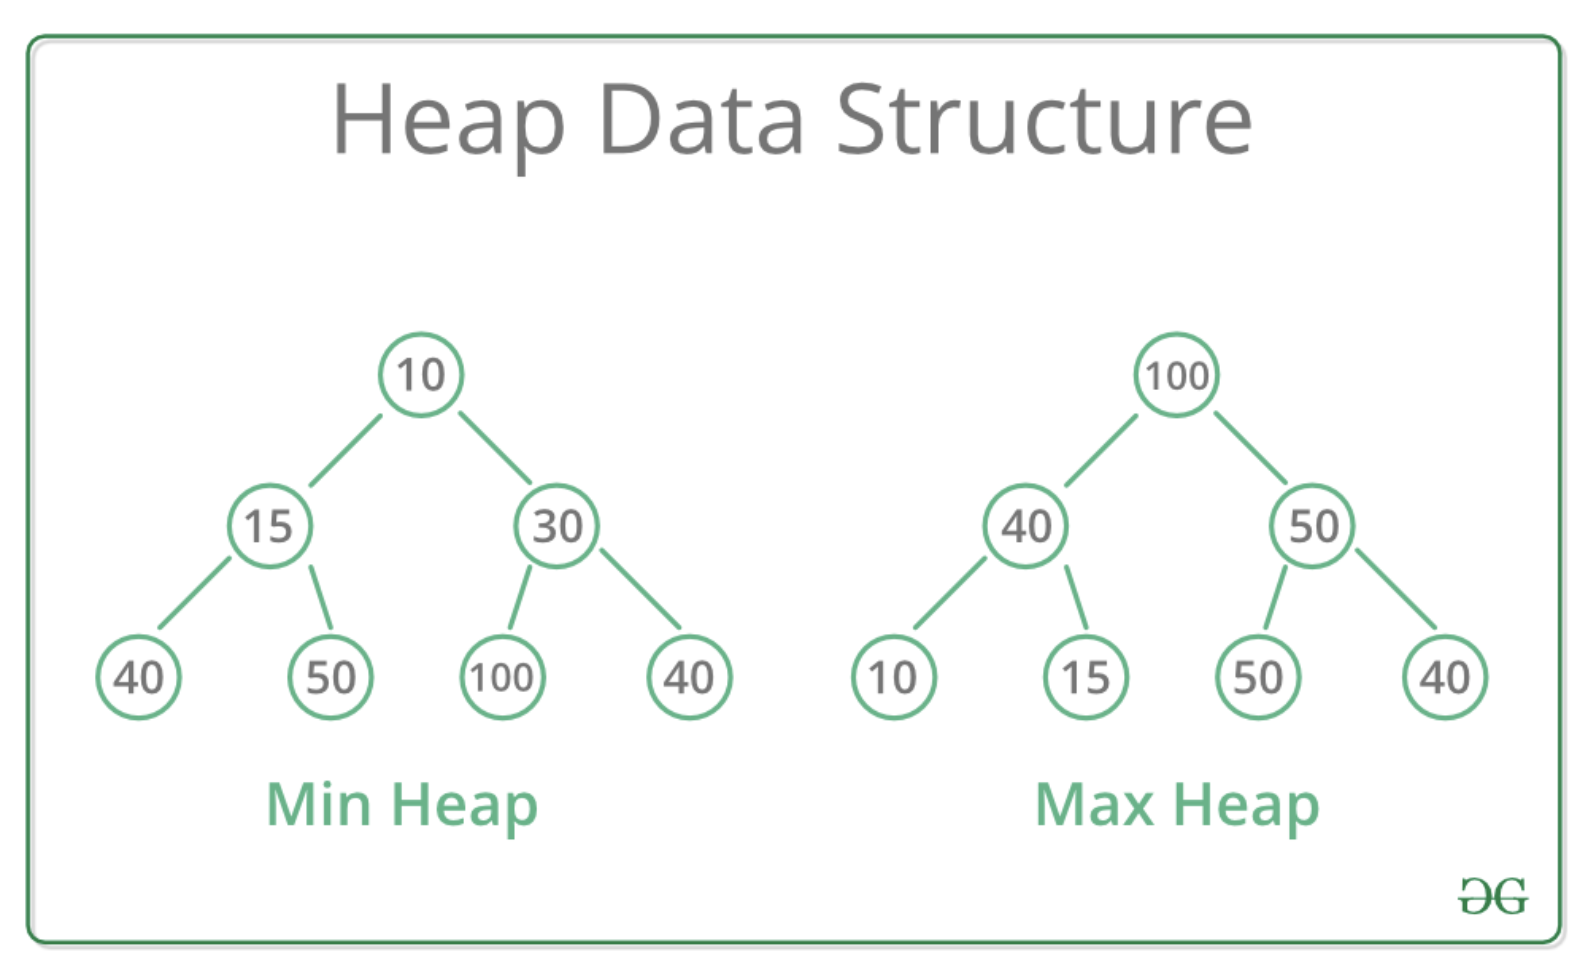

파이썬 힙 자료구조

파이썬 heapq 모듈은 heapq (priority queue) 알고리즘을 제공한다.

모든 부모 노드는 그의 자식 노드보다 값이 작거나 큰 이진트리(binary tree) 구조인데, 

내부적으로는 인덱스 0에서 시작해 k번째 원소가 항상 자식 원소들(2k+1, 2k+2) 보다 작거나 같은 **최소 힙**의 형태로 정렬된다.   

heapq는 내장 모듈로 별도의 설치 작업 없이 바로 사용할 수 있다.

힙 함수 활용하기

* heapq.heappush(heap, item) : item을 heap에 추가
* heapq.heappop(heap) : heap에서 가장 작은 원소를 pop & 리턴. 비어 있는 경우 IndexError가 호출됨. 
* heapq.heapify(x) : 리스트 x를 즉각적으로 heap으로 변환함 (in linear time, O(N) )

In [ ]:
import heapq

heap = []
heapq.heappush(heap, 50)
heapq.heappush(heap, 10)
heapq.heappush(heap, 20)

print(heap)

[10, 50, 20]


In [ ]:
heap2 = [50 ,10, 20]
heapq.heapify(heap2)

print(heap2)

[10, 50, 20]


In [ ]:
result = heapq.heappop(heap) #가장 작은 원소를 힙에서 제거함과 동시에 그를 결괏값으로 리턴

print(result)
print(heap)

10
[20, 50]


In [ ]:
result2 = heap[0] #원소를 삭제하지 않고 가져오고 싶으면 [0] 인덱싱을 통해 접근

print(result2)
print(heap)

20
[20, 50]


최대 힙 만들기

In [ ]:
heap_items = [1,3,5,7,9]

max_heap = []
for item in heap_items:
  heapq.heappush(max_heap, (-item, item))

print(max_heap)

[(-9, 9), (-7, 7), (-3, 3), (-1, 1), (-5, 5)]


In [ ]:
heap_items = [1,3,5,7,9]
max_heap = []
list(map(lambda item : heapq.heappush(max_heap, (-item, item)), heap_items))

list(map(lambda x: max_heap[x][1], range(len(max_heap))))

[9, 7, 3, 1, 5]

In [ ]:
max_item = heapq.heappop(max_heap)[1] #가장 작은 원소 (-9,9)리턴하고 [1]에서 9를 뽑은거임
print(max_item)

9


In [ ]:
temp = []
for i in [0,1,2,3,4]:
  temp.append(i**2)
temp

[0, 1, 4, 9, 16]

In [ ]:
list(map(lambda x: x ** 2, [0,1,2,3,4]))

[0, 1, 4, 9, 16]

In [ ]:
max_heap[1][1]

7

## 3.1. 더 맵게

섞은 음식의 스코빌 지수 = 가장 맵지 않은 음식의 스코빌 지수 + (두 번째로 맵지 않은 음식의 스코빌 지수 * 2)

Leo는 모든 음식의 스코빌 지수가 K 이상이 될 때까지 반복하여 섞습니다.

Leo가 가진 음식의 스코빌 지수를 담은 배열 scoville과 원하는 스코빌 지수 K가 주어질 때, 

모든 음식의 스코빌 지수를 K 이상으로 만들기 위해 섞어야 하는 최소 횟수를 return 하도록 solution 함수를 작성해주세요.

In [ ]:
def solution(scoville, K):
    answer = 0
    return answer

첫번째 시도 : 힙 없이 내 뇌로 풀기 ...

In [ ]:
scoville = [1, 2, 3, 9, 10, 12]
K = 7
scoville.sort()
count = 0
while scoville[0] < K:
  count += 1
  min = scoville.pop(0)
  min2 = scoville.pop(0)
  temp = min + min2*2
  scoville.append(temp)
  scoville.sort()
#if scoville[0] >= k

count

2

두우번째 시도

In [ ]:
import heapq

scoville = [1, 2, 3, 9, 10, 12]
K = 100
count = 0
answer = 0
heapq.heapify(scoville)
while scoville[0] < K:
  count += 1 
  min1 = heapq.heappop(scoville)
  min2 = heapq.heappop(scoville)
  temp = min1 + min2*2
  heapq.heappush(scoville, temp)

  if len(scoville) == 2 and scoville[0] < K and scoville[1] < K:
    answer = -1  

answer

-1

In [ ]:
import heapq

def solution(scoville, K):
    
    count = 0
    heapq.heapify(scoville)

    while scoville[0] < K:
        count += 1 
        min1 = heapq.heappop(scoville)
        min2 = heapq.heappop(scoville)
        temp = min1 + min2*2
        heapq.heappush(scoville, temp)
        if len(scoville) == 2 and scoville[0] < K and scoville[1] < K:
            return -1  
        
    return count

# 5. 완전탐색

## 5.1. 모의고사

핵심 idea : 


m = max(dap)

[i+1 for i,v in enumerate(dap) if v == m]

In [ ]:
def solution(answers):
    answer = []
    return answer

In [ ]:
answers = [1,3,2,4,2]

dap = []

one = [1,2,3,4,5]*2000
two = [2, 1, 2, 3, 2, 4, 2, 5]*1250
three = [3, 3, 1, 1, 2, 2, 4, 4, 5, 5]*1000

c1 = 0
c2 = 0
c3 = 0

while len(answers) != 0:
  ans = answers.pop(0)
  onep = one.pop(0)
  twop = two.pop(0)
  threep = three.pop(0)
  if onep == ans:
    c1 += 1
  if twop == ans:
    c2 += 1
  if threep == ans:
    c3 += 1

dap = [i for i in [c1,c2,c3]]

m = max(dap)
[i+1 for i,v in enumerate(dap) if v == m]

[1, 2, 3]

In [ ]:
10000/10

1000.0

In [ ]:
from itertools import cycle
cycle([1,2,3,4,5])

In [ ]:
answers = [1,3,2,4,2]

one = [1,2,3,4,5]*2000
two = [2, 1, 2, 3, 2, 4, 2, 5]*1250
three = [3, 3, 1, 1, 2, 2, 4, 4, 5, 5]*1000

score = [0,0,0]

while len(answers) != 0:
  ans = answers.pop(0)
  onep = one.pop(0)
  twop = two.pop(0)
  threep = three.pop(0)
  if onep == ans:
    score[0] += 1
  if twop == ans:
    score[1] += 1
  if threep == ans:
    score[2] += 1


m = max(score)

[i+1 for i,v in enumerate(score) if v == m]

[1, 2, 3]

다른사람 풀이

In [ ]:
from itertools import cycle

def solution(answers):
    giveups = [
        cycle([1,2,3,4,5]),
        cycle([2,1,2,3,2,4,2,5]),
        cycle([3,3,1,1,2,2,4,4,5,5]),
    ]
    scores = [0, 0, 0]
    for num in answers:
        for i in range(3):
            if next(giveups[i]) == num:
                scores[i] += 1
    highest = max(scores)

    return [i + 1 for i, v in enumerate(scores) if v == highest]

In [ ]:
def solution(answers):
    pattern1 = [1,2,3,4,5]
    pattern2 = [2,1,2,3,2,4,2,5]
    pattern3 = [3,3,1,1,2,2,4,4,5,5]
    score = [0, 0, 0]
    result = []

    for idx, answer in enumerate(answers):
        if answer == pattern1[idx%len(pattern1)]:
            score[0] += 1
        if answer == pattern2[idx%len(pattern2)]:
            score[1] += 1
        if answer == pattern3[idx%len(pattern3)]:
            score[2] += 1

    for idx, s in enumerate(score):
        if s == max(score):
            result.append(idx+1)

    return result

#나머지 연산을 이용한거에요. 어떤 수를 x로 나누면 결과는 무조건 x보다 작습니다. 그래서 특정 범위 내 숫자를 구할 때 자주사용해요.



##  5.2. 소수 찾기

In [ ]:
def solution(numbers):
    answer = 0
    return answer

In [52]:
import itertools
import math

# 제곱근까지만 보고 소수를 판별하는 함수
def is_prime_number(x):
    # 2부터 x의 제곱근까지의 모든 수를 확인하며

    if x < 2:
      return False

    for i in range(2, int(math.sqrt(x))+1):
    # x가 해당 수로 나누어 떨어진다면
      if x % i == 0:
          return False
    return True

num = "17"
temp = [ int(i) for i in num ] 
sub = []
print('temp', temp)
nPr = itertools.permutations(temp, len(temp))
nPr = list(nPr)
print('nPr', nPr)
#print('temp', temp)

for i in temp:
  if is_prime_number(i) == True:
    sub.append(i)

for i in range(len(nPr)):
  mat = "".join(list(map(str,nPr[i])))
  print("mat", mat)
  while mat[0] == "0":
      mat = mat[1:]
      print("mat2", mat)
  if is_prime_number(int(mat)) == True:
    sub.append(int(mat))
    #print(sub)

sub = set(sub)
sub = list(sub)
sub
#"".join(nPr[0])



temp [1, 7]
nPr [(1, 7), (7, 1)]
mat 17
mat 71


[17, 71, 7]

In [17]:
is_prime_number(210)

False

In [ ]:
def solution(numbers):

  def is_prime_number(x):
      # 2부터 (x - 1)까지의 모든 수를 확인하며
      for i in range(2, x):
          # x가 해당 수로 나누어떨어진다면
          if x % i == 0:
              return False # 소수가 아님
      return True # 소수임

  temp = [ int(i) for i in numbers ] 
  sub = []

  nPr = itertools.permutations(temp, len(temp))
  nPr = list(nPr)
  for i in range(len(nPr)):
    mat = "".join(list(map(str,nPr[i])))
    while mat[0] == "0":
        mat = mat[1:]
        if is_prime_number(int(mat)) == True:
          sub.append(int(mat))
  sub = set(sub)
  sub = list(sub)
  len(sub)

  return sub

In [ ]:
solution("011")

[11]

In [ ]:
import itertools

def is_prime_number(x):
        # 2부터 (x - 1)까지의 모든 수를 확인하며
    for i in range(2, x):
            # x가 해당 수로 나누어떨어진다면
    if x % i == 0:
      return False # 소수가 아님
    
    return True # 소수임


def solution(numbers):
    

    
    temp = [ int(i) for i in num ] 
    sub = []

    nPr = itertools.permutations(temp, len(temp))
    nPr = list(nPr)
    #print('nPr', nPr)
    #print('temp', temp)

    for i in temp:
        if is_prime_number(i) == True and i != 1 and i != 0:
            sub.append(i)

    for i in range(len(nPr)):
        mat = "".join(list(map(str,nPr[i])))
        while mat[0] == "0":
            mat = mat[1:]
        if is_prime_number(int(mat)) == True:
            sub.append(int(mat))

    sub = set(sub)
    sub = list(sub)
    
    return len(sub)

다른사람 풀이

In [33]:
from itertools import permutations
def solution(n):
    a = set()
    for i in range(len(n)):
        a |= set(map(int, map("".join, permutations(list(n), i + 1))))
    a -= set(range(0, 2))
    for i in range(2, int(max(a) ** 0.5) + 1):
        a -= set(range(i * 2, max(a) + 1, i))
    return len(a)

In [43]:
n = '011'
a = set()
for i in range(len(n)):
  a |= set(map(int, map("".join, permutations(list(n), i + 1))))
  print(a)
a -= set(range(0, 2))
print('a,', a)
for i in range(2, int(max(a) ** 0.5) + 1):
  a -= set(range(i * 2, max(a) + 1, i))

{0, 1}
{0, 1, 10, 11}
{0, 1, 101, 10, 11, 110}
a, {101, 10, 11, 110}


In [42]:
set(range(0, 2))

{0, 1}

In [45]:
list(n)

['0', '1', '1']

In [ ]:
from itertools import permutations

def sosu(n):
    if n < 2:
        return False
    
    for i in range(2, n//2+1):
        if n%i == 0:
            return False
        
    return True    

def solution(numbers):
    answer = 0
    p = []
    result = []
    
    for i in range(1, len(numbers)+1):
        p.extend(permutations(numbers, i))
        result = [int(''.join(i)) for i in p]
    
    for i in set(result):
        if sosu(i):
            answer+=1
            
    return answer

In [68]:
import itertools
import math

# 제곱근까지만 보고 소수를 판별하는 함수
def is_prime_number(x):
    # 2부터 x의 제곱근까지의 모든 수를 확인하며

    if x < 2:
      return False

    for i in range(2, int(math.sqrt(x))+1):
    # x가 해당 수로 나누어 떨어진다면
      if x % i == 0:
          return False
    return True

num = "110"
#temp = [ int(i) for i in num ] 
sub = []
answer = 0
for i in range(1, len(num)+1):
  sub.extend(permutations(num, i)) #모든 경우의 수 넣기
  print(sub)
  result = [int(''.join(i)) for i in sub]
  print(result)

for i in set(result):
        if is_prime_number(i):
            answer+=1

print(answer)


[('1',), ('1',), ('0',)]
[1, 1, 0]
[('1',), ('1',), ('0',), ('1', '1'), ('1', '0'), ('1', '1'), ('1', '0'), ('0', '1'), ('0', '1')]
[1, 1, 0, 11, 10, 11, 10, 1, 1]
[('1',), ('1',), ('0',), ('1', '1'), ('1', '0'), ('1', '1'), ('1', '0'), ('0', '1'), ('0', '1'), ('1', '1', '0'), ('1', '0', '1'), ('1', '1', '0'), ('1', '0', '1'), ('0', '1', '1'), ('0', '1', '1')]
[1, 1, 0, 11, 10, 11, 10, 1, 1, 110, 101, 110, 101, 11, 11]
2


In [ ]:
from itertools import permutations

def sosu(n):
    if n < 2:
        return False
    
    for i in range(2, n//2+1):
        if n%i == 0:
            return False
        
    return True    

def solution(numbers):
    answer = 0
    p = []
    result = []
    
    for i in range(1, len(numbers)+1):
        p.extend(permutations(numbers, i))
        result = [int(''.join(i)) for i in p]
    
    for i in set(result):
        if sosu(i):
            answer+=1
            
    return answer